In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL (1).csv


In [ ]:
apple = pd.read_csv("AAPL.csv")

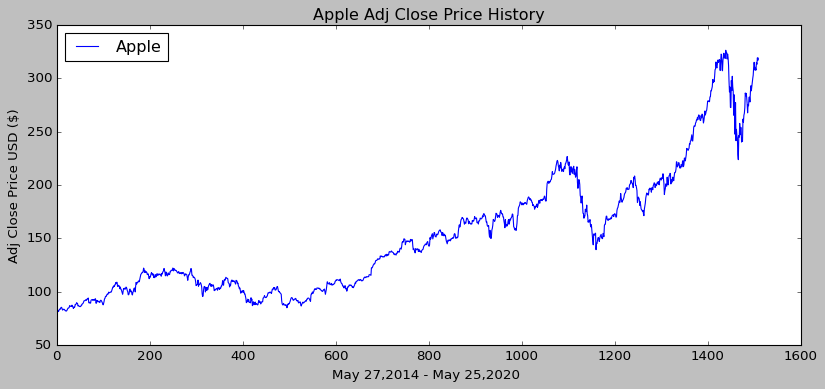

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("May 27,2014 - May 25,2020 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
sma30 = pd.DataFrame()
sma30['Adj Close Price'] = apple['Adj Close Price'].rolling(window=30).mean()
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,294.812523
1506,297.087250
1507,299.281020
1508,301.409145


In [ ]:
sma100 = pd.DataFrame()
sma100['Adj Close Price'] = apple['Adj Close Price'].rolling(window=100).mean()
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,273.011395
1506,273.965167
1507,274.658373
1508,275.501645


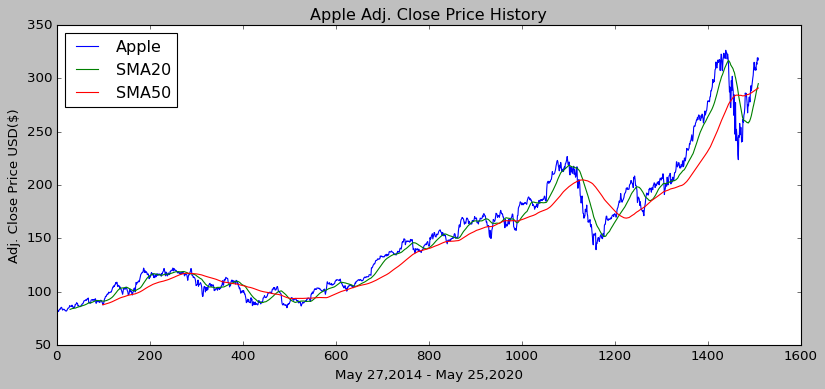

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.plot(sma30['Adj Close Price'], label='SMA30')
plt.plot(sma100['Adj Close Price'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 27,2014 - May 25,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data = pd.DataFrame()
data['apple'] = apple['Adj Close Price']
data['SMA30'] = sma30['Adj Close Price']
data['SMA100'] = sma100['Adj Close Price']
data

,apple,SMA20,SMA50
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


In [ ]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [ ]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
# To show the data
data

,apple,SMA20,SMA50,Buy Signal Price,Sell Signal Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


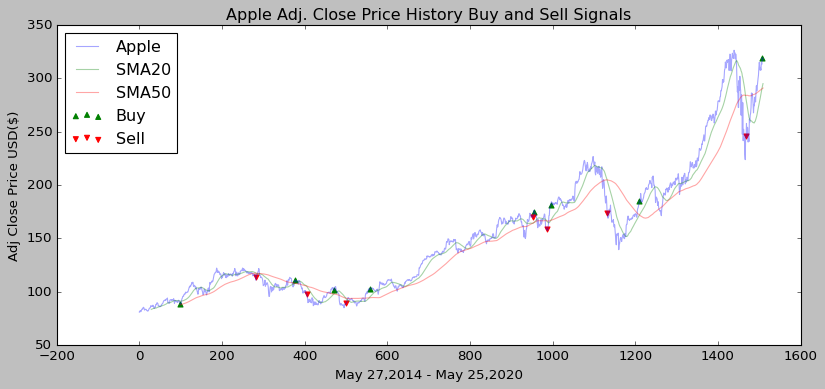

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data['apple'], label='Apple', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 27,2014 - May 25,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()